<center> <h1>Método de la Secante</h1> </center>

El método de la secante es un algoritmo para buscar las raíces o zeros de una función de forma iterativa. El método se basa en el uso de la secante, una línea que corta una curva en un mínimo de dos puntos distintos. A partir de dos estimaciones iniciales de la raíz de la función que buscamos, se calcula la secante que une a dichos dos puntos y la intersección de dicha recta secante con el eje de las x. Dicha intersección se toma como aproximación de la raíz buscada. Si la aproximación no es suficientemente buena, se repite el proceso de calcular la secante utilizando uno de los puntos anteriores y la aproximación recién calculada. 

El método de la secante se puede considerar como una variación del método de Newton-Raphson donde en vez de calcular la derivada de la función en el punto de estudio, se aproxima dicha derivada (i.e., la pendiente a la recta) mediante la secante. Hay que aclarar que el método de la secante es anterior al método de Newton en más de 3000 años.

El principal inconveniente del método de Newton es que requiere conocer el valor de la primera derivada de la función en el punto. Sin embargo, la forma funcional de f(x) dificulta en ocasiones el cálculo de la derivada. En estos casos es más útil emplear el método de la secante. Este método es de especial interés cuando el coste computacional de derivar la función de estudio y evaluarla es demasiado elevado, por lo que el método de Newton no resulta atractivo.

Comenzando con los valores iniciales $x_0$ y $x_1$, construimos una línea a través de los puntos $(x_0, f(x_0))$ y $(x_1, f(x_1))$, como se muestra en la imagen siguiente. 

<img src="./images/Secant_method.png">

En forma de pendiente-intersección, la ecuación de esta recta es

$${\displaystyle y={\frac {f(x_{1})-f(x_{0})}{x_{1}-x_{0}}}(x-x_{1})+f(x_{1}).}$$

La raíz de esta función lineal es el valor de x para el cual y = 0 está dado por:

$$ {\displaystyle x=x_{1}-f(x_{1}){\frac {x_{1}-x_{0}}{f(x_{1})-f(x_{0})}}.} $$ 

El método se define mediante la siguiente fórmula recurrente:

$${\displaystyle x_{n}=x_{n-1}-f(x_{n-1}){\frac {x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}}}$$


Los elementos $x_{n}$ de la sucesión obtenida mediante el método convergen a una raíz de $f$ si los valores iniciales $x_{0}$ y $x_{1}$ están suficientemente cerca de la raíz. 

El orden de convergencia es $\varphi$, donde

$${\displaystyle \varphi ={\frac {1+{\sqrt {5}}}{2}}\approx 1.618}$$

es el número áureo. En particular, la convergencia es súper lineal, pero no llega a ser cuadrática como en el caso del método de Newton-Raphson.

En análisis numérico, el orden de convergencia mide la velocidad con la cual una sucesión converge a su límite. Desde el punto de vista práctico, este concepto es muy importante para trabajar con métodos iterativos. 

Se dice que una sucesión $(x_{n})$ que converge a $x^{*}$ tiene orden de convergencia $q \geq 1$ y tasa de convergencia $\mu$ si

$${\displaystyle \lim _{n\rightarrow \infty }{\frac {\left|x_{n+1}-x^{*}\right|}{\left|x_{n}-x^{*}\right|^{q}}}=\mu .}$$

La tasa de convergencia $\mu$ también se denomina constante de error asintótico. Esta terminología no está estandarizada, por lo que el uso de uno u otro término depende del autor. Mientras mayor sea el orden de convergencia, se necesitarán menos iteraciones para obtener una aproximación útil.

Para que el método converja se requiere que la función sea dos veces continuamente diferenciable y la raíz sea simple (i.e., con multiplicidad 1).

Si los valores iniciales no están lo suficientemente cerca de la raíz, entonces no hay garantía de que el método converja. No existe una definición general de "lo suficientemente cerca", pero el criterio tiene que ver con cuán "ondulada" es la función en el intervalo $[x_{0},x_{1}]$. Por ejemplo, si $f$ es diferenciable en ese intervalo y hay un punto donde $f^´=0$ en el intervalo, entonces el algoritmo puede no converger.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from math import cos, sin

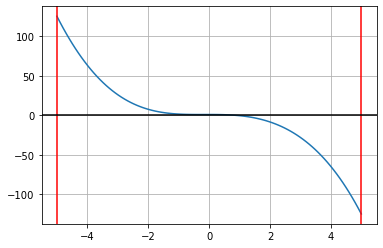

In [2]:
def f(x):
    return cos(x) - x**3

x_low = -5
x_high = 5

def graf0():
    x = np.linspace(x_low, x_high, num = 100)
    f_x = [f(x[i]) for i in range(len(x))]

    plt.plot(x, f_x)
    plt.grid()
    plt.axvline(x_low, color = 'r')
    plt.axvline(x_high, color = 'r')
    plt.axhline(color = 'k')
    
graf0()
plt.show()

f(x0)= 0.9940041652780258
f(x1)= 0.9720665778412416
Iteración	Aproximación	Función
	 0 	 0.2 	 0.9720665778412416
	 1 	 4.631055058549025 	 -99.4019582946752
	 2 	 0.24291230258486252 	 0.9563082173835941
	 3 	 0.2847266654911468 	 0.9366558827696188
	 4 	 2.277653702901914 	 -12.465245979545383
	 5 	 0.42401188431299075 	 0.8352142750412466
	 6 	 0.5404129770620177 	 0.6996707331620458
	 7 	 1.1412710981900474 	 -1.0700660808136147
	 8 	 0.7779640291823584 	 0.24149828262766693
	 9 	 0.8448597421778238 	 0.06078545266527258


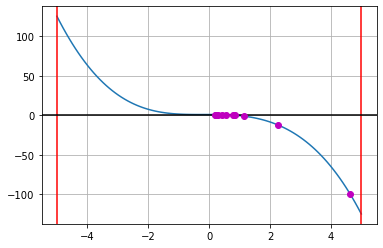

In [3]:
x0 = 0.1
x1 = 0.2
n = 10
eps = 0.000000001
print('f(x0)=', f(x0))
print('f(x1)=', f(x1))


def secante():
    global x0, x1
    print('Iteración\tAproximación\tFunción')
    for i in range(n):
        print('\t', i, '\t', x1, '\t', f(x1))
        plt.plot(x1, f(x1), 'mo')
        if abs(f(x1)-f(x0)) < eps:
            print('Cociente muy pequeño')
            return x1
        x2 = x1 - f(x1)*( (x1-x0) / (f(x1)-f(x0)) )
        x0 = x1
        x1 = x2        
    return x1

graf0()
secante()
plt.show()

Iteración	Aproximación	Función
	 0 	 0.2 	 0.9720665778412416
	 1 	 4.631055058549025 	 -99.4019582946752
	 2 	 0.24291230258486252 	 0.9563082173835941
	 3 	 0.2847266654911468 	 0.9366558827696188
	 4 	 2.277653702901914 	 -12.465245979545383
	 5 	 0.42401188431299075 	 0.8352142750412466
	 6 	 0.5404129770620177 	 0.6996707331620458
	 7 	 1.1412710981900474 	 -1.0700660808136147
	 8 	 0.7779640291823584 	 0.24149828262766693
	 9 	 0.8448597421778238 	 0.06078545266527258
	 10 	 0.8673611118738309 	 -0.005687755434518826
	 11 	 0.8654357905085607 	 0.00011505004461076496
	 12 	 0.8654739631320892 	 2.105060002977055e-07
	 13 	 0.865474033104212 	 -7.814859870336477e-12
	 14 	 0.8654740331016144 	 1.1102230246251565e-16
	 15 	 0.8654740331016144 	 1.1102230246251565e-16
Cociente muy pequeño


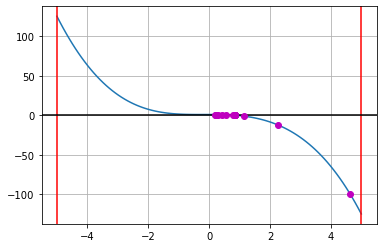

In [4]:
x0 = 0.1
x1 = 0.2
n = 20
eps = 1.0e-20
graf0()
secante()
plt.show()

<center> <h3>Bibliografía</h3> </center>

* [Método de la secante](https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_secante)

* [4.4 Método de la secante](https://www.uv.es/~diaz/mn/node21.html#eqn:sec-2)

* [Secant line](https://en.wikipedia.org/wiki/Secant_line)

* [Número áureo](https://es.wikipedia.org/wiki/N%C3%BAmero_%C3%A1ureo)

* [Rate of convergence](https://en.wikipedia.org/wiki/Rate_of_convergence)